Problema: estamos projetando um eixo de transmissão automotivo tridimensional para um veículo. O eixo de transmissão é uma peça crucial para a transmissão de energia do motor para as rodas, e sua estrutura complexa exige a determinação dos momentos de inércia e torções em várias seções ao longo do seu comprimento.

A relação entre o cálculo da inércia, o cálculo da tensão média em cada ponto e a tensão média estimada está na aplicação das integrais triplas para determinar a distribuição de tensão ao longo de um eixo de transmissão devido a um torque aplicado.

O torque aplicado refere-se à força rotacional ou ao momento aplicado a um objeto que o faz girar em torno de um eixo específico. Em termos simples, o torque é uma medida da tendência de uma força a causar rotação em torno de um ponto ou eixo.

O momento de inércia, também conhecido como inércia rotacional, é uma propriedade física de um objeto que descreve a sua resistência à rotação em torno de um eixo específico. O momento de inércia é uma medida da distribuição da massa de um objeto em relação a um eixo de rotação. Quanto maior o momento de inércia, mais difícil é fazer um objeto girar, e isso depende da forma do objeto e da distribuição de sua massa em relação ao eixo.

Cálculo do Momento de Inércia:

Para determinar a resistência do eixo à torção e à inércia, pode-se calcular o momento de inércia em relação aos eixos principais. Isso envolve o uso de integrais triplas para calcular o momento de inércia de uma seção transversal do eixo. O momento de inércia é importante para avaliar a capacidade do eixo de resistir a deformações devido à torção. O cálculo pode ser feito usando a seguinte fórmula:

$ I = \iiint_V r^2 \rho dV$

Onde: 

- $I$ é o momento de inércia.
- $r$ é a distância do elemento de volume .
- $dV$ ao eixo de rotação.
- $\rho$ é a densidade do material.

In [1]:
import numpy as np
from scipy.integrate import tplquad

# Parâmetros do eixo
comprimento = 1.20  # Comprimento do eixo em metros
raio = 0.05  # Raio do eixo em metros
densidade = 102000  # Densidade do material em kg/m³

# Função para calcular o integral do momento de inércia em relação a um eixo
def integrand_x(x, y, z):
    r = np.sqrt(y**2 + z**2)
    return r**2 * densidade

def integrand_y(x, y, z):
    r = np.sqrt(x**2 + z**2)
    return r**2 * densidade

def integrand_z(x, y, z):
    r = np.sqrt(x**2 + y**2)
    return r**2 * densidade

# Cálculo dos momentos de inércia
Ixx = tplquad(integrand_x, -raio, raio, lambda z: -raio, lambda z: raio, lambda x, z: 0, lambda x, z: comprimento)
Iyy = tplquad(integrand_y, -raio, raio, lambda x: -raio, lambda x: raio, lambda y, z: 0, lambda y, z: comprimento)
Izz = tplquad(integrand_z, -raio, raio, lambda y: -raio, lambda y: raio, lambda x, y: 0, lambda x, y: comprimento)


Ixx_formatted = "{:.2e}".format(Ixx[0])
Iyy_formatted = "{:.2e}".format(Iyy[0])
Izz_formatted = "{:.2e}".format(Izz[0])
print(f'Momento de Inércia Ixx: {Ixx_formatted} kg·m²')
print(f'Momento de Inércia Iyy: {Iyy_formatted} kg·m²')
print(f'Momento de Inércia Izz: {Izz_formatted} kg·m²')


Momento de Inércia Ixx: 2.04e+00 kg·m²
Momento de Inércia Iyy: 5.89e+02 kg·m²
Momento de Inércia Izz: 5.89e+02 kg·m²


Para calcular a tensão média, você pode integrar a tensão em todos os pontos do eixo e depois dividir pela extensão do eixo. A integral tripla é usada para calcular a tensão em cada ponto, e a tensão média pode ser calculada da seguinte forma:

$Tensão Média = 1/V\iiint_V S(x, y, z) dV$

Onde: 
- $Tensão Média$ é a tensão média estimada.
- $V$ é o volume do eixo de transmissão.
- $\iiint_V$ representa a integral tripla sobre o volume do eixo.
- $S(x, y, z)$ é a tensão no ponto $(x, y, z)$ que é calculada usando a equação de tensão 

Equação de tensão $(S)$ em um ponto específico do eixo com base na fórmula do momento fletor:

$S = 32T/\pi d^3$

Onde: 

- $S$ é a tensão no ponto específico.
- $T$ é o torque aplicado.
- $d$ é o diâmetro do eixo no ponto específico.

A integral tripla considera a contribuição de cada elemento infinitesimal de volume ao longo do eixo, calculando a tensão em todos os pontos. A média dessas tensões em todo o volume fornece a tensão média estimada. Isso representa a tensão média ao longo de todo o eixo de transmissão sob a ação do torque aplicado.

In [5]:
# Função para calcular a distribuição de tensão no eixo
def integrand_stress(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    moment_of_inertia = r**2
    torque = 50
    stress = torque * r / moment_of_inertia
    return stress

# Cálculo da tensão média no eixo usando uma integral tripla
average_stress = tplquad(integrand_stress, -raio, raio, lambda z: -raio, lambda z: raio, lambda x, z: 0, lambda x, z: comprimento)
average_stress_formatted = "{:.2e}".format(average_stress[0])

print(f'Tensão Média Estimada: {average_stress_formatted} Pa (N/m²)')

Tensão Média Estimada: 2.12e+00 Pa (N/m²)


O cálculo da integral para calcular a distribuição de tensão no eixo é baseado nos princípios da mecânica dos materiais e da teoria de elasticidade. A tensão é a força interna por unidade de área em um material. No caso de um eixo submetido a um torque, a tensão varia ao longo do eixo devido à variação da distância radial. A integral tripla é usada para calcular a tensão em diferentes pontos do eixo.

A integral tripla é definida como:

A integral definida de f(x) em relação a x de a a b é escrita como:

$\iiint_V f(x, y, z) dV$

Onde:

- $f(x,y,z)$ é a função que descreve a distribuição de tensão no eixo.
- $dV$ é o elemento de volume diferencial.
- $V$ é o volume no qual estamos calculando a distribuição de tensão

A função $f(x,y,z)$ é determinada com base nas propriedades do material e na carga aplicada. No caso de um eixo de transmissão sujeito a um torque, a função $f(x,y,z)$ é derivada da equação que relaciona o torque, o raio, o momento de inércia e a tensão. Essa relação é conhecida como a fórmula do momento fletor.

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Função para calcular a distribuição de tensão no eixo
def integrand_stress(x, y, z, torque, moment_of_inertia):
    r = np.sqrt(x**2 + y**2 + z**2)
    stress = torque * r / moment_of_inertia
    return stress

raio_values = np.linspace(0.5, 0.7, 10)  # Varie o raio do eixo
comprimento_values = np.linspace(0, 1.20, 10)  # Varie o comprimento do eixo
tensao_results = np.zeros((len(raio_values), len(comprimento_values)))

# Parâmetros de carga
torque = 50  # Torque em Newton-metros
moment_of_inertia = 2.04  # Momento de inércia limite em kg·m²

# Realize cálculos para diferentes valores de raio e comprimento
for i, raio in enumerate(raio_values):
    for j, comprimento in enumerate(comprimento_values):
        result = tplquad(integrand_stress, -raio, raio, lambda z: -raio, lambda z: raio, lambda x, z: 0, lambda x, z: comprimento,
                         args=(torque, moment_of_inertia))
        tensao_results[i, j] = result[0]

raio_grid, comprimento_grid = np.meshgrid(raio_values, comprimento_values)

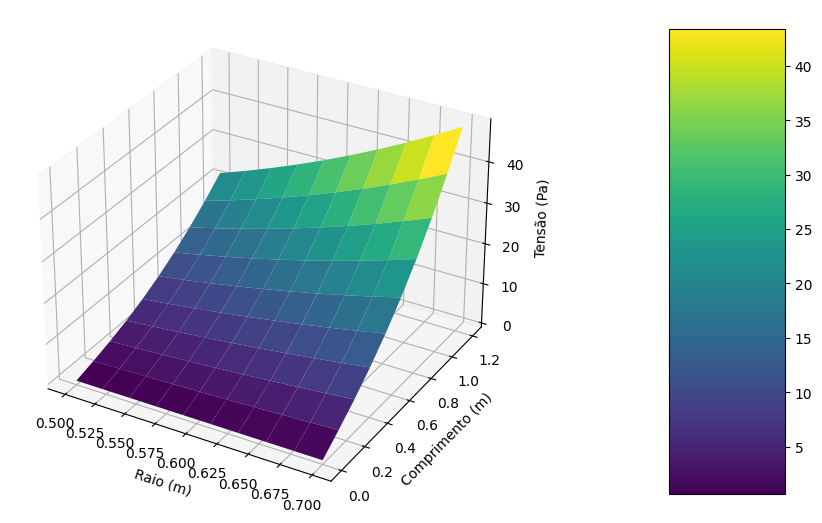

In [9]:
# Criação do gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(raio_grid, comprimento_grid, tensao_results.T, cmap='viridis')
ax.set_xlabel('Raio (m)')
ax.set_ylabel('Comprimento (m)')
ax.set_zlabel('Tensão (Pa)')
color_bar = plt.colorbar(surf, ax=ax, pad=0.2, aspect=4)
plt.show()